In [145]:
from make_df import make_search_df
from sklearn.decomposition import PCA
#from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [146]:
search_df = make_search_df()
search_df = search_df.apply(pd.to_numeric)
search_df.loc[(slice(None), ['US-ID']),:]


,,symptom:Angular cheilitis,symptom:Aphonia,symptom:Burning Chest Pain,symptom:Crackles,symptom:Dysautonomia,symptom:Hemolysis,symptom:Laryngitis,symptom:Myoclonus,symptom:Rectal pain,symptom:Rumination,symptom:Shallow breathing,symptom:Stridor,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia
date,open_covid_region_code,,,,,,,,,,,,,,,
2020-01-06,US-ID,NaN,31.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.27
2020-01-13,US-ID,NaN,35.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.67
2020-01-20,US-ID,NaN,28.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.09
2020-01-27,US-ID,NaN,30.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.71
2020-02-03,US-ID,NaN,31.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.53
2020-02-10,US-ID,NaN,33.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.40
2020-02-17,US-ID,NaN,32.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.38
2020-02-24,US-ID,NaN,31.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.76
2020-03-02,US-ID,NaN,39.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.20


In [147]:
search_df.values

array([[  nan,   nan,   nan, ...,   nan,  9.91,   nan],
       [ 5.92,  5.17,  2.24, ...,  2.43,  4.33,  5.2 ],
       [10.2 , 10.99,  7.57, ...,  8.97,  7.3 , 13.9 ],
       ...,
       [ 8.48,   nan,   nan, ...,  7.8 , 14.09,   nan],
       [15.84, 16.73, 16.29, ..., 25.17, 25.02, 16.29],
       [  nan,   nan,  2.52, ...,   nan,  3.23,   nan]])

In [148]:
# checking if the mean of the symptom can be added...seems like its missing for the whole region
rgn_group = pd.DataFrame(search_df.groupby('open_covid_region_code').mean()) # the mean 

rgn_group


,symptom:Angular cheilitis,symptom:Aphonia,symptom:Burning Chest Pain,symptom:Crackles,symptom:Dysautonomia,symptom:Hemolysis,symptom:Laryngitis,symptom:Myoclonus,symptom:Rectal pain,symptom:Rumination,symptom:Shallow breathing,symptom:Stridor,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia
open_covid_region_code,,,,,,,,,,,,,,,
US-AK,8.088462,8.506000,8.487333,8.147143,8.645000,8.286087,10.980667,8.158261,8.120000,9.391429,8.048333,10.356400,7.289375,8.756552,11.743333
US-DC,4.943684,3.605333,3.207632,3.157419,4.282368,5.309211,4.495789,4.043158,4.086842,7.514737,4.566053,3.952778,3.309730,4.300789,5.604545
US-DE,7.151579,6.508611,6.520789,7.253684,7.811579,8.896579,8.441053,7.307895,7.860263,9.023684,6.788684,7.842368,6.913684,7.333684,7.960345
US-HI,34.301316,31.010556,NaN,26.010263,NaN,NaN,40.322105,NaN,NaN,NaN,34.529474,NaN,NaN,NaN,35.702414
US-ID,NaN,21.827568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.816842
US-ME,17.748684,14.815263,14.688158,19.414737,24.632632,18.937105,22.319474,19.149474,19.252368,NaN,16.210789,20.416053,17.662368,18.662105,21.979063
US-MT,8.081667,8.923571,7.800000,9.701389,11.437105,10.115676,11.453784,8.927353,9.153611,11.526316,7.686562,11.615946,8.959459,9.263784,14.548800
US-ND,5.065926,6.251250,5.558065,7.252121,6.279355,8.018000,8.470714,5.565625,6.034595,7.099730,6.138889,8.190000,6.250556,6.361667,10.352857
US-NE,NaN,48.332368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
search_df = search_df.fillna(0).astype(float) # filling with 0 for now. not sure if I will keep this
values = search_df.values
values.shape

(608, 15)

In [157]:
pca = PCA()
pca.fit(values)

PCA()

In [158]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.42342132, 0.27926178, 0.10232279, 0.07820776, 0.03678098,
       0.02543417, 0.01331543, 0.01024278, 0.00791299, 0.00520153,
       0.00485195, 0.00392693, 0.00358651, 0.00318067, 0.00235242])

In [161]:
cum_var_exp = np.cumsum(exp_var)


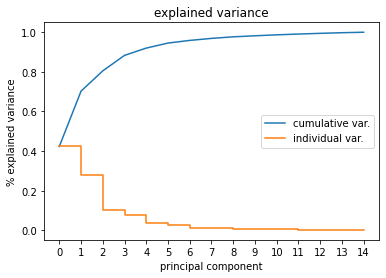

In [180]:
# so according to this, we only *really* need like 1 PC. 
num_comps = pca.n_components_
xs = range(num_comps)
plt.plot(xs, cum_var_exp, label='cumulative var.')
plt.step(xs,exp_var, where='post', label='individual var.')
plt.xticks(xs);
plt.title("explained variance");
plt.xlabel("principal component");
plt.ylabel("% explained variance");
plt.legend();

In [188]:
pc_2= cum_var_exp[1]  # 0.7026830967953422 with 2 pcs
pc_3 = cum_var_exp[2] #0.8050058826252661 with 3 pcs
pc_2


0.7026830967953422

In [189]:
# see what happens with a higher threshold for the data

In [205]:
search_df_2= make_search_df(threshold=.7)

In [206]:
search_df_2 = search_df.apply(pd.to_numeric)
search_df_2.values.shape

(608, 15)

In [204]:
num_comps

15